## Tensorflow 2.x版本

In [ ]:
%tensorflow_version 2.x

## 1.載入套件、資料集

In [4]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

## 2.Data Preprocessing

In [5]:
#用CIFAR10資料集
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(x_train, y_train0), (x_test, y_test0) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 626s 4us/step


In [6]:
# Normalize the range of featurs
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [7]:
# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

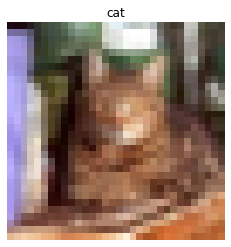

In [8]:
idx = np.random.randint(x_train.shape[0])
x_sample = x_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])
plt.axis('off');

In [11]:
# 卷積神經網路層
CNN_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(160, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(800, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]
# 全連結層
FC_layers = [Dense(units=160, activation='relu'),
             Dense(units=10, activation='softmax')]

In [12]:
CNN_layers + FC_layers

In [13]:
model = Sequential(CNN_layers+FC_layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 160)       46240     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 160)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 800)         1152800   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 160)               1

In [14]:
model.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])

## 訓練

In [15]:
model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=5,
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 382s 8ms/sample - loss: 1.7983 - categorical_accuracy: 0.3166 - val_loss: 1.5710 - val_categorical_accuracy: 0.4167
Epoch 2/5
50000/50000 [==============================] - 364s 7ms/sample - loss: 1.4568 - categorical_accuracy: 0.4627 - val_loss: 1.3553 - val_categorical_accuracy: 0.4991
Epoch 3/5
50000/50000 [==============================] - 321s 6ms/sample - loss: 1.2856 - categorical_accuracy: 0.5320 - val_loss: 1.2070 - val_categorical_accuracy: 0.5621
Epoch 4/5
50000/50000 [==============================] - 273s 5ms/sample - loss: 1.1740 - categorical_accuracy: 0.5765 - val_loss: 1.1346 - val_categorical_accuracy: 0.5890
Epoch 5/5
50000/50000 [==============================] - 272s 5ms/sample - loss: 1.0788 - categorical_accuracy: 0.6128 - val_loss: 1.0572 - val_categorical_accuracy: 0.6196


In [16]:
# 存下來
model.save_weights('LeNet5_CIFAR10_HW.h5')

## 預測

In [17]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 24s 2ms/sample - loss: 1.0572 - categorical_accuracy: 0.6196
Train Accuracy: 63.26799988746643
Test Accuracy: 61.959999799728394


## 遷移學習

## 讀入fashion_mnist 資料集

In [18]:
from tensorflow.keras.datasets import fashion_mnist

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(x_train2, y_train2), (x_test2, y_test2) = fashion_mnist.load_data()

In [21]:
x_train2 = x_train2.reshape(60000, 28, 28, 1)/255
x_test2 = x_test2.reshape(10000, 28, 28, 1)/255

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train2 = to_categorical(y_train2, 10)
y_test2 = to_categorical(y_test2, 10)

In [24]:
#開一個函數學習機
from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.optimizers import SGD #學習方法

In [25]:
CNN_layer2 = [Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

In [26]:
FC_layer2 = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]

In [27]:
model2 = Sequential(CNN_layer2+FC_layer2)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 128)         73856     
_________________________________________________________________
global_average_pooling2d_2 ( (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [28]:
model2.compile(loss='categorical_crossentropy', 
               optimizer=Adam(), 
               metrics=['categorical_accuracy'])

## batch_size=256 /epochs=10來訓練

In [29]:
model2.fit(x_train2, y_train2,
           batch_size=256,
           epochs=10, 
           validation_data=(x_test2, y_test2))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 68s 1ms/sample - loss: 1.0707 - categorical_accuracy: 0.6053 - val_loss: 0.7514 - val_categorical_accuracy: 0.7156
Epoch 2/10
60000/60000 [==============================] - 59s 979us/sample - loss: 0.6865 - categorical_accuracy: 0.7431 - val_loss: 0.6459 - val_categorical_accuracy: 0.7509
Epoch 3/10
60000/60000 [==============================] - 59s 985us/sample - loss: 0.6106 - categorical_accuracy: 0.7717 - val_loss: 0.6317 - val_categorical_accuracy: 0.7680
Epoch 4/10
60000/60000 [==============================] - 60s 1000us/sample - loss: 0.5558 - categorical_accuracy: 0.7965 - val_loss: 0.5534 - val_categorical_accuracy: 0.7924
Epoch 5/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.5102 - categorical_accuracy: 0.8157 - val_loss: 0.5130 - val_categorical_accuracy: 0.8169
Epoch 6/10
60000/60000 [==============================] - 60s 994us/sample - l

In [30]:
score_train = model2.evaluate(x_train2, y_train2)
score_test = model2.evaluate(x_test2, y_test2)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 6s 553us/sample - loss: 0.3950 - categorical_accuracy: 0.8602
Train Accuracy: 86.8233323097229
Test Accuracy: 86.01999878883362
